<a href="https://colab.research.google.com/github/Yoon0527/AIFFEL_Going_Deeper/blob/main/%5BGD_05%5D_Class_Activation_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [GD_05] 너의 속이 궁금해 - Class Activation Map 살펴보기
그동안의 노드에서 다룬 딥러닝은 모델의 추론 근거를 알 수 없는 블랙박스 모델이었다. 예를 들어 개와 고양이를 분류하는 모델을 만들었다고 했을 때, 이미지 어떤 부분을 보고 결론을 내렸는지 알 수 없었음. 
* XAI(Explainable Artificial Intelligence, 설명 가능한 인공지능)
  * 위에서 언급한 모델과 추론의 신뢰성에 대한 답을 찾는 분야
  * 모델의 성능을 개선할 수 있는 단서로도 유용하게 활용된다.

## XAI(Explainabel AI)
현실 문제에 신경망 모델을 적용할 때에는 실습 문제를 풀 때처럼 단순히 모델의 가중치(weight)를 최적화 하는 과정만을 믿고, 곧바로 모델이 올바르게 동작한다고 넘겨짚기는 어렵다. 

이 때, 모델이 잘못된 답변을 준다면 어떻게 개선할 수 있을지, 잘 동작한다면 왜 이런 선택을 했는지 알고자 하는 것을 XAI(Explainable AI)라고 한다.

잠깐 CNN의 구조에 대해 살펴보자.

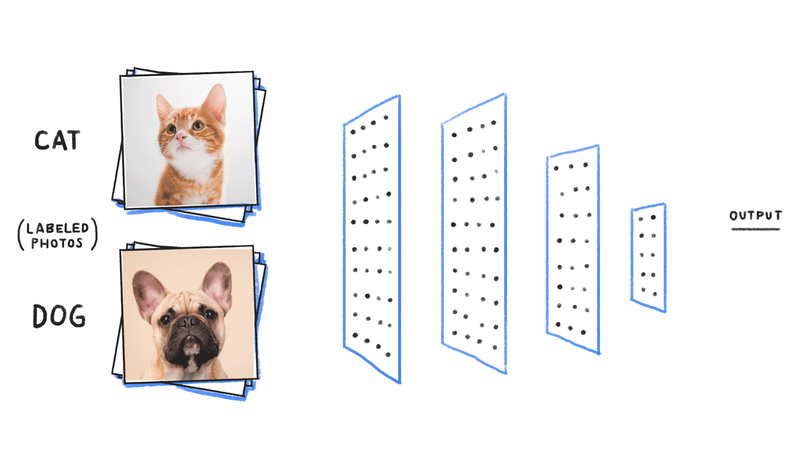

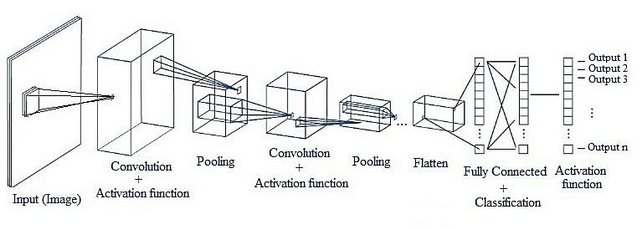

출처:https://halfundecided.medium.com/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-cnn-convolutional-neural-networks-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-836869f88375

위 그림처럼 분류모델에 이미지가 입력으로 들어온다고 생각해보자. 
1. 먼저 일반적인 이미지 분류 모델은 이미지의 local feature를 추출하기 위해 CNN으로 구성된 특성 추출용 백본 네트워크가 앞에 있다.
2. 백본 네트워크에서 추출된 특성 맵(feature map)을 fully connected layer에 통과시켜 얻어진 logit을
3. 소프트맥스 활성화 함수에 통과시키면, 입력 이미지가 각 클래스에 속할 확률을 얻을 수 있다.

> **logit, sigmoid, softmax의 관계**<br>logit은 sigmoid의 역함수이고, softmax는 sigmoid를 k개의 클래스로 일반화한 것이다.

이런 이미지 분류 모델에서 얻어진 logit값이 k개의 클래스 중 하나가 정답이라고 가리킨다면, 그렇게 분류한 근거를 이미지 분류 모델 안에서 찾아볼 수 있을까?

방법 중 하나로 생각해 볼 수 있는 것은 **레이어마다 feature map을 시각화해서, activation이 어떻게 되어있는지 확인해볼 수 있을 것이다.**

## CAM: Class Activation Map, 모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지 확인할 수 있는 지도
CAM을 알아보기 전에 이 CAM을 얻기 위해 사용한 GAP(Global Average Pooling)기법을 먼저 보자.

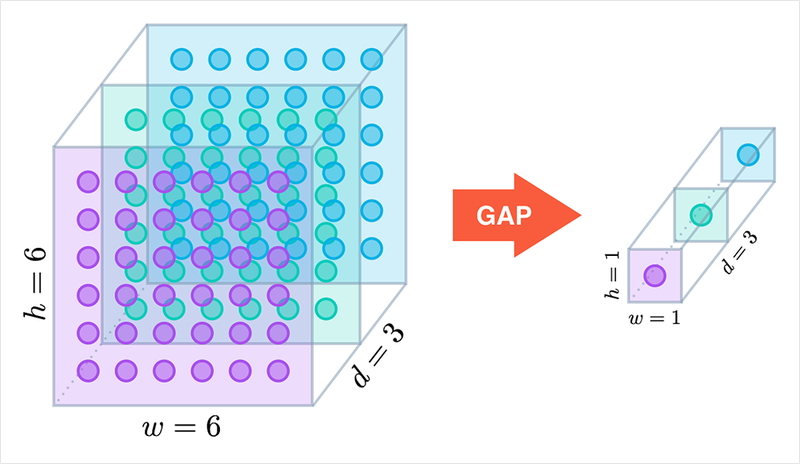

### 1. GAP(Global Average Pooling)
일반적으로 이미지 분류에서는 여러 CNN 레이어를 거쳐 우선 특성을 추출하고, 그 특성 맵을 flattening한 후, fully connected layer에 입력해 줌으로써 각 클래스에 따른 logit을 구하고 최종적으로 활성화 함수를 거치게 한다. 

그런데 Network in Network 논문에서는 CNN 이후 fully connected layer 대신 GAP 연산을 한다. 

GAP은 매 채널별로, average pooling을 채널의 값 전체에 global하게 적용한다. 위 그림에서 볼 수 있 듯이 크기가 6*6이고 채널이 3개인 특성맵에 대해서 GAP을 수행하면 각 채널이 딱 한 개의 숫자로 요약되어 1X1인 크기의 채널이 3개인 벡터를 얻게 된다. 이때 결과 벡터의 각 차원의 값은 6X6 크기의 특성 맵을 채널별로 평균을 낸 값이다. 

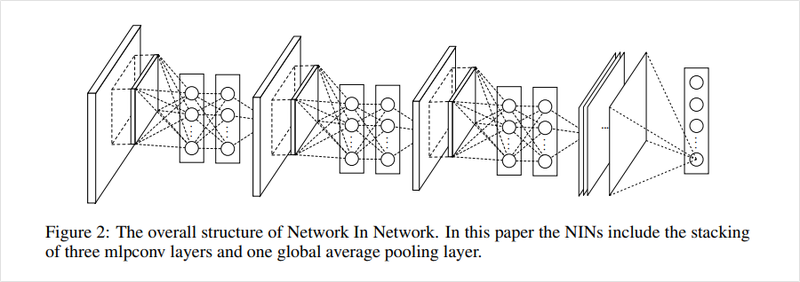

위 그림처럼 GAP 연산을 하고, 그 연산 결과에 소프트 맥스 활성화 함수를 적용한다. 이 때 마지막 CNN 레이어의 채널 수는 데이터의 클래스 수에 맞춰 각 클래스에 따른 확률을 얻을 수 있도록 했다. 원 논문에 따르면 이렇게 함으로써 특성 맵의 각 채널이 클래스별 신뢰도를 나타내게 되어 해석이 쉬울 뿐만 아니라, fully connected layer와 달리 최적화할 파라미터가 존재하지 않아 과적합을 방지할 수 있다고 설명한다.

### 2. CAM
CAM(Class Activation Map)은 **클래스가 활성화되는 지도이다.** 

일반적인 CNN은 커널 윈도우에 따라서 특성을 추출하므로 CNN 레이어를 거친 특성 맵에도 입력값의 위치 정보가 유지된다. 따라서 특성 맵의 정보를 이미지 검출(detection)이나 세그멘테이션(segmentation) 등의 문제를 푸는 데 이용하기도 한다. 

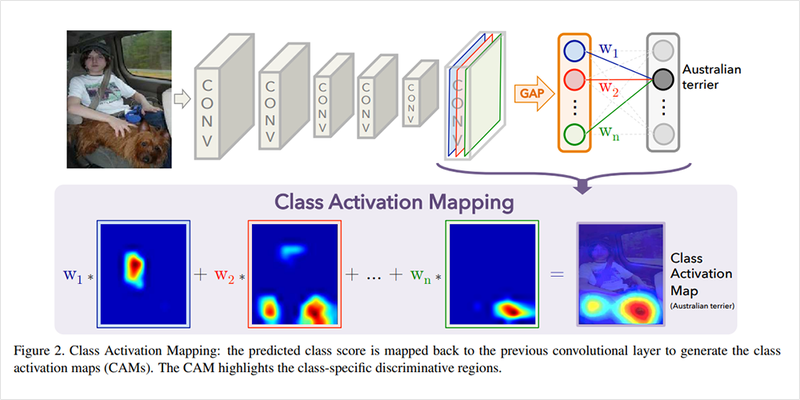

CAM을 얻을 수 있는 네트워크는 위 그림에서 볼 수 있다. 
1. 먼저 CNN 레이어를 거쳐 뽑아낸 특성 맵에 대해 GAP를 적용한다.
2. 이에 대해 소프트맥스 레이어(소프트맥스 활성화 함수를 가지고 bias가 없는 fully connected layer)를 적용한다.

CNN을 거친 특성맵에서 각 클래스에 대한 정보는 결괏값의 여러 채널에 걸쳐 나타나게 된다. GAP을 통해 각 채널별 정보를 요약하면 소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정한다. 이렇게 클래스별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면, 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화 시키는지 확인할 수 있다.

이렇게 얻은 특성 맵은 CNN의 출력값 크기와 같게된다. 이를 보간(interpolation)을 통해 적절히 원본 이미지 크기로 확대해 주면 위와 같은 CAM을 얻을 수 있다.

단, CAM에도 문제가 있다. 

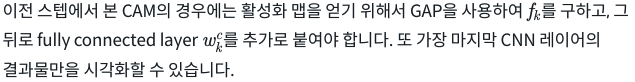

즉, CAM의 모델의 구조가 제한되는 문제가 있다. 이를 해결하기 위해 Grad-CAM(Gradient CAM)이 제안된다.

## Grad-CAM
Grad-CAM은 CAM의 모델의 구조가 제한되는 문제를 해결하고, 다양한 모델의 구조를 해석할 수 있는 방법을 제안한다. Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없고, 분류 문제 외의 다른 태스크들에 유연하게 대처할 수 있다. 

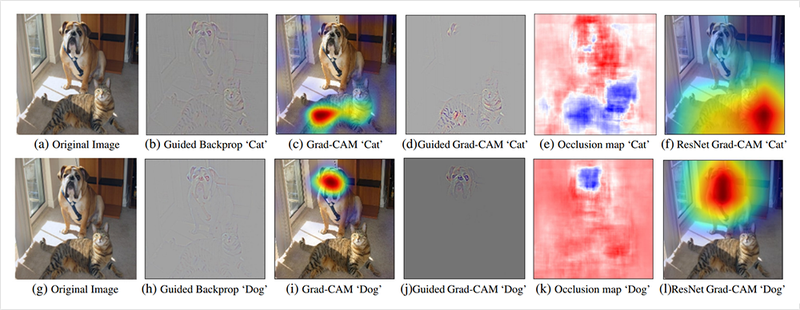

위는 개와 고양이가 있는 이미지에 대해서 Guided Backprop, Grad-CAM, Occlussion map의 시각화를 비교하고 있다. Grad-CAM에서는 높은 분별력과 큰 dimension을 갖는 CAM을 만드는 것을 중요하게 보았다.

## ACoL: Adversarial Complementary Learning
CAM에서 신기한 점은 클래스와 이미지만을 데이터로 학습을 하는데 **덤으로 위치 정보까지 얻을 수 있다는 것이다.** 
> 이처럼 직접적으로 정답 위치 정보를 주지 않아도 간접적인 정보를 활용하여 학습하고 원하는 정보를 얻어낼 수 있도록 모델을 학습하는 방식을 약지도학습(weakly supervised leaning)이라고 한다.

지금까지 봐왔던 CAM, Grad-CAM 그리고 지금 볼 ACoL은 약지도학습 기법을 활용해 물체 검출(object detection)을 수행할 수 있다.

### 1. 약지도학습(weakly supervised learning)
딥러닝 관련 공부를 하다 보면 약지도학습과 준지도학습(semi-supervised learning)이라는 단어를 만날 수 있다. 두 개념이 다소 혼용되기 때문에 다음과 같은 경우들로 나누어 생각해보자.
* **incomplete supervision**: 학습 데이터 중 일부에만 라벨이 달린 경우. 일반적으로 말하는 준지도학습과 같은 경우임. (예: 개와 고양이 분류 학습 시 10,000개의 이미지 중 1,000개만 라벨이 있는 경우)
* **inexact supervision**: 학습데이터의 라벨이 충분히 정확하게 달려있지 않은 경우. (예: 개나 고양이를 Object Detection 또는 Semantic Segmentation해야 하지만 이미지 내에 정확한 bounding box는 주어져 있지 않고 이미지가 개인지 고양인지 정보만 라벨로 달려있는 경우)
* **inaccurate supervision**: 학습 데이터에 Noise가 있는 경우, (예: 개나 고양이의 라벨이 잘못 달린 경우)

약지도학습이란 위 3가지 경우를 포괄적으로 일컫도록 사용되곤 하지만, 오늘 다루고자 하는 것은 inexact supervision에 해당하는 경우이다. 일반적으로 image classification용 학습 데이터보다는 bounding box 정보까지 정확하게 포함해야 하는 object detection이나 semantic segmentation을 위한 학습 데이터가 훨씬 제작비용이 많이 든다. 

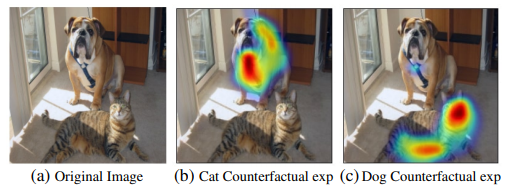

위 이미지는 약지도학습을 통한 object detection과 semantic segmentation의 예시이다. 

아이디어는 간단하다. Grad-CAM을 통해서는 개와 고양이의 특징이 두드러지게 하는 영역의 가중치 점수를 계산할 수 있었지만, 해당 가중치 점수를 제거해주면 image classification 모델에서 해당 클래스에 대한 prediction이 바뀌게 될 수도 있다. 가중치 점수를 제거했을 때 prediction이 바뀌도록 하는 가중치 영역을 모으면 bounding box 라벨을 한 번도 보지 않고서도 object detection을 해낼 수 있다는 것이다.

또한 Grad-CAM을 이용해 위와 비슷한 논리로 semantic segmentation도 수행 가능하다. 아래 이미지는 Grad-CAM을 이용해 semantic segmentation을 수행한 것이다.

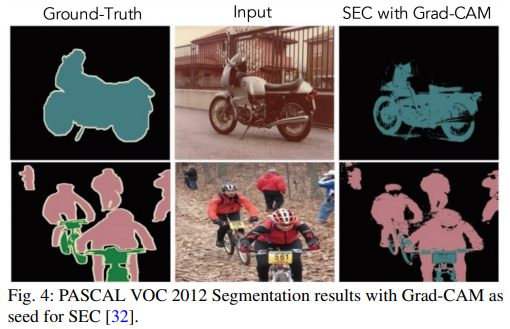

### 2. Adversarial Complementary Learning


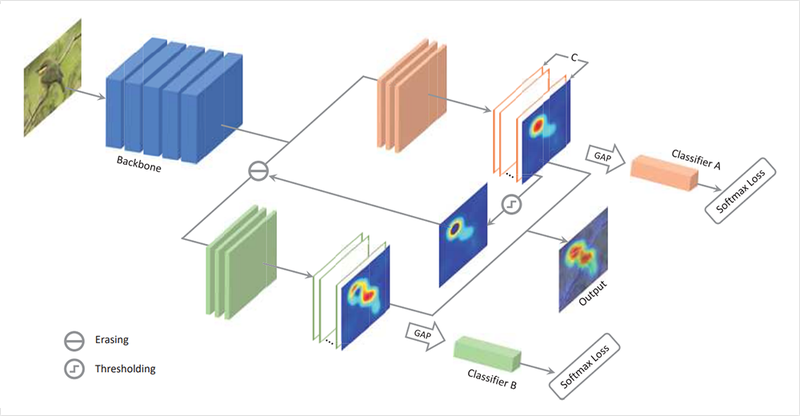

Adversarial의 뜻은 '적대적인'이다. 위 그림과 같이 ACoL은 모델의 학습에는 끝단이 두 브랜치(branch)로 나뉜다. CAM을 만들기 위해 활용했던 특성맵을 두가지로 분리한 것이다.

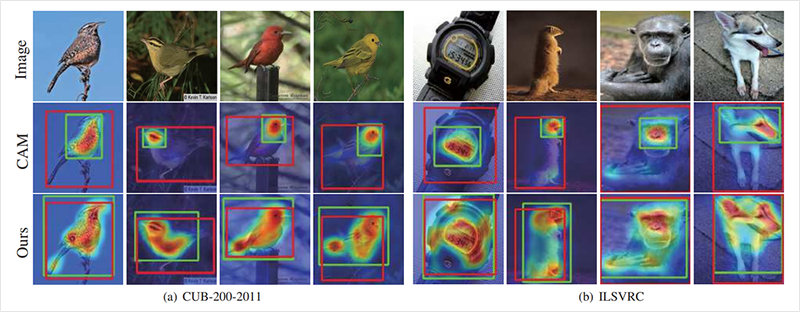

CAM과 Grad-CAM은 Weakly-supervised 방식의 Object Detection, Segmentation의 가능성을 보여주었다. 하지만 이 방식들에는 문제가 하나 있음. CAM을 통해 본 활성화 맵을 보면 가장자리보다는 특징이 주로 나타나는 위치에 중점적으로 활성화되는 모습을 볼 수 있다. 

하지만 물체 검출(object detection)은 새의 부리나 동물의 눈과 같이 부분적 특성이 아닌 물체의 전체적인 형태와 윤곽을 정확하게 구분해 내는 것이 중요하다. CAM 모델이 특정 부위에 집중해 학습하는 것을 막기 위해서 ACoL은 **브랜치를 두 가지로 나누어 너무 높은 점수를 지워줌으로써 주변의 특성 또한 반영하도록 했다.** 이런 과정을 논문에서는 Adversial, 즉 적대적인 학습방법이라고 한다.

ACoL의 구조를 살펴보면 먼저 위쪽 주황색 브랜치를 거칩니다. 특성 맵은 GAP을 거쳐 CAM에서 보았던 소프트맥스 레이어인 Classifier A를 거치게 됩니다. 이 브랜치는 loss로 학습됩니다.

ACoL은 여기서 얻어진 활성화 맵을 적대적인 방법으로 사용합니다. 일정 값 이상 활성화된 활성화 맵을 지우도록 하는 것이지요. Classifier A는 쉽게 전체적인 이미지를 보고 클래스를 판별할 수 있는 반면에 Classifier B는 A의 CAM에서 크게 활성화된 영역을 지운 활성화 맵에서 분류를 해야 하기 때문에 더 어려운 문제를 푸는 것으로 볼 수 있습니다.

이렇게 두 가지 Classifier A와 Classifier B를 학습시킴으로써 더 넓은 영역을 판별의 근거로 삼을 수 있습니다. 이 과정을 통해서 모델은 쉽게 맞출 수 있는 샘플을 어렵게 다시 한 번 학습을 하는 Adversarial Complementary Learning 과정을 거치게 됩니다.

결과적으로 위 그림에서는 기존 CAM이 활성화되는 부분과 달리 ACoL은 물체의 전반적인 영역으로 CAM이 활성화되는 효과를 확인할 수 있습니다.

### 3. 1x1 Conv

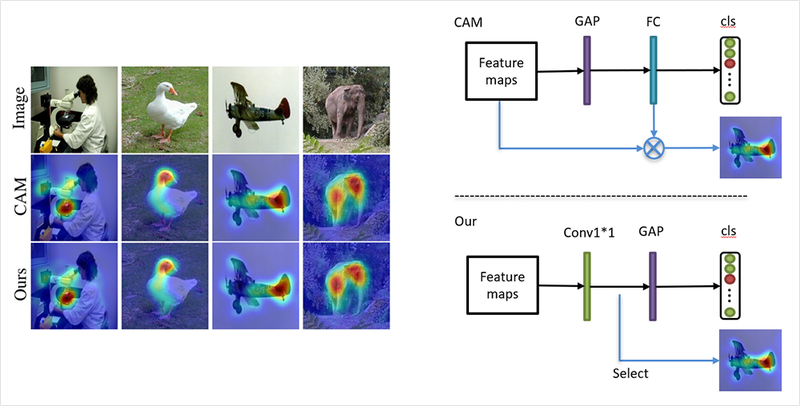

CAM에서는 CAM을 얻기 위해서 대상이 되는 네트워크에 feed forward를 하고 활성화 맵과 가중치 계산을 다시 해주어야 합니다. 이 과정은 관찰하고자 하는 분류 모델의 feed forward와 별개의 작업이므로, 물체 검출을 위한 모델로 사용하기 위해서는 모델의 feed forward 외 별도의 연산을 해주어야 하는 단점이 있습니다.

ACoL 논문은 이를 개선하기 위해서 커널 사이즈는 1x1, 출력 채널의 개수는 분류하고자 하는 클래스 개수를 가진 컨볼루션 레이어를 특성 맵에 사용하고 여기에 GAP를 적용하여 Network in Network에서 본 구조와 유사한 방식을 사용하고 있습니다. 여기서 컨볼루션 레이어의 출력값은 곧바로 활성화 맵이 됩니다. 이렇게 구해진 활성화 맵과 CAM을 비교한 결과를 위 그림의 왼쪽에서 볼 수 있습니다.